Лабораторна робота 12: Основи обробки природної мови (NLP)

                                                data         labels
0  Musicians to tackle US red tape  Musicians gro...  entertainment
1  U2s desire to be number one  U2, who have won ...  entertainment
2  Rocker Doherty in on-stage fight  Rock singer ...  entertainment
3  Snicket tops US box office chart  The film ada...  entertainment
4  Oceans Twelve raids box office  Oceans Twelve,...  entertainment


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.950561797752809
Text: Musicians to tackle US red tape  Musicians groups are to tackle US visa regulations which are blamed for hindering British acts chances of succeeding across the Atlantic.  A singer hoping to perform in the US can expect to pay $1,300 (xc2xa3680) simply for obtaining a visa. Groups including the Musicians Union are calling for an end to the "raw deal" faced by British performers. US acts are not faced with comparable expense and bureaucracy when visiting the UK for promotional purposes.  Nigel McCune from the Musicians Union said British musicians are "disadvantaged" compared to their US counterparts. A sponsor has to make a petition on their behalf, which is a form amounting to nearly 30 pages, while musicians face tougher regulations than athletes and journalists. "If you make a mistake on your form, you risk a five-year ban and thus the ability to further your career," says Mr McCune.  "The US is the worlds biggest music market, which means something

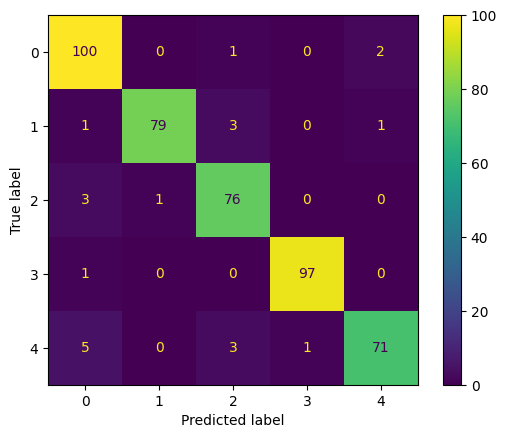

In [ ]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Завантаження даних
data = pd.read_csv("bbc_data.csv")

# Перевірка наявності даних
print(data.head())

# 2. Передобробка тексту

# Очистка тексту: видаляємо пунктуацію та приводимо до нижнього регістру
data['cleaned_text'] = data['data'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Видалення стоп-слів
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)

# Лемматизація тексту
nlp = spacy.load("en_core_web_sm")
data['lemmatized_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join([token.lemma_ for token in nlp(x)])
)

# 3. Векторизація тексту (TF-IDF)
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['lemmatized_text'])

# 4. Розбиття даних на тренувальний та тестовий набір
X_train, X_test, y_train, y_test = train_test_split(X, data['labels'], test_size=0.2, random_state=42)

# 5. Навчання моделі
model = MultinomialNB()
model.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred = model.predict(X_test)

# Оцінка точності
print("Accuracy:", accuracy_score(y_test, y_pred))

# 6. Візуалізація матриці похибок
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# 7. Виведення кількох прикладів прогнозів
for i in range(5):
    print(f"Text: {data['data'].iloc[i]}")
    print(f"Actual label: {y_test.iloc[i]}")
    print(f"Predicted label: {y_pred[i]}")
    print("-" * 50)
